# BP storing full probabilities instead of just one parameter

In [3]:
using OffsetArrays, Statistics, StatsBase
include("../code/bp_full.jl")
include("../code/bp.jl")

plot_rdb (generic function with 1 method)

In [191]:
f1 = 5/100
f3 = 0.3
f2 = 1 - f1- f3
Lambda = [f1,f2,f3]
K = [0,0,1]
n = 9000
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
m = Int(nedges/3)
R = 1 - m/n

0.25

In [315]:
A = permutedims(ldpc_matrix(n,m,nedges, Lambda,K))
s = rand([-1.0,1], n)
efield = [(si,-si) .- 1 for si in s]
ms = BPFull(A, efield)
ms.efield .= [e .+ 1e-6.*(randn(),randn()) for e in ms.efield];

In [316]:
ε, iters = iteration!(ms, maxiter=1000, damp=0.5, tol=1e-12, rein=1e-3,
        update_f! = update_factor_ms!, update_v! = update_var_ms!)
@show ε
nunsat, ovl, dist = performance(ms, s)

ε = 10588.561274216743


(0, 0.5184444444444445, 0.24077777777777779)

(109, 0.554, 0.223)

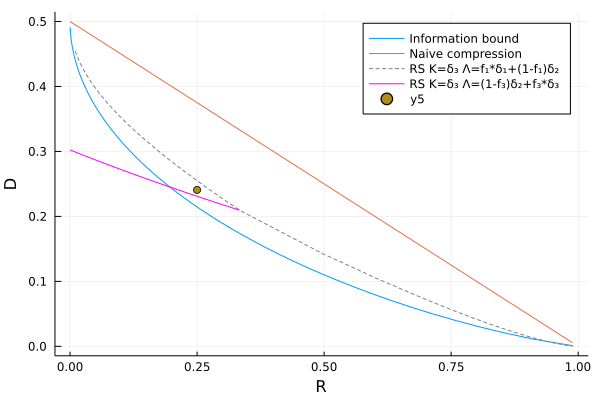

In [317]:
plot_rdb()
scatter!([R], [dist])

In [5]:
H = 1.5
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
A = sparse(ldpc_matrix(n, m, nedges, Lambda, K)')
bp = BPFull(A, efield)
# find basis with leaf removal
B, indep = findbasis(bp.H)
R_bp = size(B,2)/n

LoadError: ArgumentError: argument is not a permutation

In [257]:
A
proportionmap(vec(sum(A,dims=1))), Lambda
proportionmap(vec(sum(A,dims=2))), K

(Dict(2 => 0.0004385964912280702, 3 => 0.999561403508772), [0, 0, 1])

In [253]:
A
proportionmap(vec(sum(A,dims=1))), Lambda
# proportionmap(vec(sum(A,dims=2))), K

(Dict(2 => 0.23333333333333334, 1 => 0.7666666666666667), [0.01, 0.7, 0.29000000000000004])

In [144]:
nunsat, ovl, dist = 0,0,0
for j in 1:50
    A = sparse(ldpc_matrix(n, m, nedges, Lambda, K)')
    bp = BPFull(A, efield)
    err,iters = iteration!(bp, maxiter=5*10^4, damp=0.5, rein=1e-4)
    nunsat, ovl, dist = performance(bp,s)
    @show j, nunsat, ovl, dist
    nunsat == 0 && (println("ue"); break)
end

(j, nunsat, ovl, dist) = (1, 12, 0.5213333333333333, 0.23933333333333334)
(j, nunsat, ovl, dist) = (2, 8, 0.518, 0.241)
(j, nunsat, ovl, dist) = (3, 4, 0.5213333333333333, 0.23933333333333334)
(j, nunsat, ovl, dist) = (4, 13, 0.5026666666666666, 0.24866666666666667)
(j, nunsat, ovl, dist) = (5, 2, 0.5193333333333333, 0.24033333333333334)
(j, nunsat, ovl, dist) = (6, 2, 0.5186666666666666, 0.24066666666666667)
(j, nunsat, ovl, dist) = (7, 11, 0.5146666666666666, 0.24266666666666667)
(j, nunsat, ovl, dist) = (8, 2, 0.532, 0.234)
(j, nunsat, ovl, dist) = (9, 12, 0.516, 0.242)
(j, nunsat, ovl, dist) = (10, 7, 0.5193333333333333, 0.24033333333333334)
(j, nunsat, ovl, dist) = (11, 5, 0.516, 0.242)
(j, nunsat, ovl, dist) = (12, 11, 0.5273333333333333, 0.23633333333333334)
(j, nunsat, ovl, dist) = (13, 9, 0.5186666666666666, 0.24066666666666667)
(j, nunsat, ovl, dist) = (14, 3, 0.512, 0.244)
(j, nunsat, ovl, dist) = (15, 0, 0.5226666666666666, 0.23866666666666667)
ue


In [115]:
err,iters = iteration!(bp, maxiter=5*10^4, damp=0.5, rein=1e-4)

(0.294185884514463, 50000)

In [134]:
nunsat, ovl, dist = performance(bp,s)

(0, 0.522, 0.239)

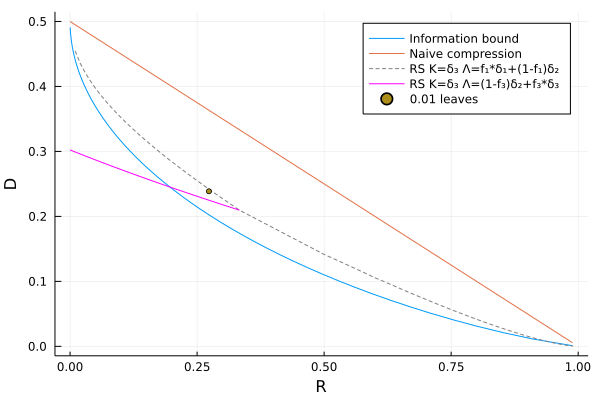

In [146]:
plot_rdb()
scatter!([R], [dist], ms=3, label="$f1 leaves")

In [82]:
include("../code/rs.jl")
F1 = 0:0.005:0.2
R_RS = zeros(length(F1))
D_RS = zeros(length(F1))
for i in eachindex(F1)
    Λ = [F1[i], 0.8, 0.2-F1[i]]
    R_RS[i], D_RS[i], _ = RS(K, Λ, N=100, tol=1e-6, maxiter=100)
end

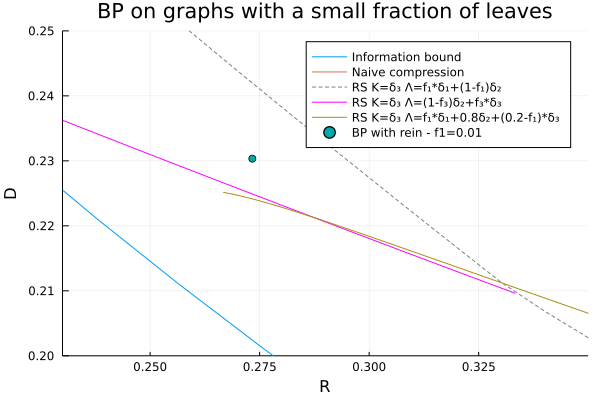

In [83]:
pl_ms = plot_rdb()
plot!(pl_ms, R_RS, D_RS, label="RS K=δ₃ Λ=f₁*δ₁+0.8δ₂+(0.2-f₁)*δ₃")
scatter!(pl_ms, [R_bp], [dist], label="BP with rein - f1=$f1", ms=4)
plot(pl_ms, size=(600,400), legend=:topright)
xlims!((0.23,0.35)); ylims!((0.2,0.25))
title!("BP on graphs with a small fraction of leaves")

# Decimation

In [216]:
# m = factorial(5)*11*2
# R = 0.8/3
# r = 1 - 3R
# n = round(Int, 3m/(2+r))
# Λ = OffsetVector([0,0,1-r,r], 0:3)
# K = OffsetVector([0,0,0,1], 0:3)
# nedges = 3m
f1 = 1/100
f2 = 0.8
f3 = 1 - f1 -f2
Lambda = [f1,f2,f3]
K = [0,0,1]
n = 3000
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
m = Int(nedges/3)
H = 3
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Lambda, K, efield)
B, indep = findbasis_slow(Array(bp.H))
R = size(B,2)/n

0.2733333333333333

In [217]:
nunsat, ovl, dist = decimate!(bp, efield, indep, s, maxiter=10^3, Tmax=1, tol=1e-5, 
    callback=cb_decimation, fair_decimation=true) 

Avg distortion after 1st BP round: 0.22020054001862943
 Step    0. Free = 820. Maxfield = -Inf. ε = 9.99E-01. Unsat = 338. Ovl = 0.571. Iters 1000
 Step    1. Free = 819. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 305. Ovl = 0.560. Iters 1000
 Step    2. Free = 818. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 328. Ovl = 0.564. Iters 1000
 Step    3. Free = 817. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 350. Ovl = 0.564. Iters 1000
 Step    4. Free = 816. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 324. Ovl = 0.567. Iters 1000
 Step    5. Free = 815. Maxfield = 1.00E+00. ε = 9.94E-01. Unsat = 338. Ovl = 0.568. Iters 1000
 Step    6. Free = 814. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 331. Ovl = 0.555. Iters 1000
 Step    7. Free = 813. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 354. Ovl = 0.571. Iters 1000
 Step    8. Free = 812. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 325. Ovl = 0.569. Iters 1000
 Step    9. Free = 811. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 356. Ovl = 0.567. 

 Step   85. Free = 735. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 319. Ovl = 0.554. Iters 1000
 Step   86. Free = 734. Maxfield = 1.00E+00. ε = 9.93E-01. Unsat = 339. Ovl = 0.562. Iters 1000
 Step   87. Free = 733. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 404. Ovl = 0.562. Iters 1000
 Step   88. Free = 732. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 353. Ovl = 0.590. Iters 1000
 Step   89. Free = 731. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 343. Ovl = 0.571. Iters 1000
 Step   90. Free = 730. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 350. Ovl = 0.588. Iters 1000
 Step   91. Free = 729. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 349. Ovl = 0.574. Iters 1000
 Step   92. Free = 728. Maxfield = 1.00E+00. ε = 9.96E-01. Unsat = 263. Ovl = 0.568. Iters 1000
 Step   93. Free = 727. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 359. Ovl = 0.562. Iters 1000
 Step   94. Free = 726. Maxfield = 1.00E+00. ε = 9.96E-01. Unsat = 327. Ovl = 0.573. Iters 1000
 Step   95. Free = 725. Maxfield = 1.00E

 Step  171. Free = 649. Maxfield = 1.00E+00. ε = 9.92E-01. Unsat = 405. Ovl = 0.571. Iters 1000
 Step  172. Free = 648. Maxfield = 1.00E+00. ε = 9.94E-01. Unsat = 341. Ovl = 0.570. Iters 1000
 Step  173. Free = 647. Maxfield = 1.00E+00. ε = 9.91E-01. Unsat = 321. Ovl = 0.576. Iters 1000
 Step  174. Free = 646. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 373. Ovl = 0.577. Iters 1000
 Step  175. Free = 645. Maxfield = 1.00E+00. ε = 9.96E-01. Unsat = 375. Ovl = 0.551. Iters 1000
 Step  176. Free = 644. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 347. Ovl = 0.567. Iters 1000
 Step  177. Free = 643. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 320. Ovl = 0.558. Iters 1000
 Step  178. Free = 642. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 357. Ovl = 0.569. Iters 1000
 Step  179. Free = 641. Maxfield = 1.00E+00. ε = 9.87E-01. Unsat = 355. Ovl = 0.569. Iters 1000
 Step  180. Free = 640. Maxfield = 1.00E+00. ε = 9.95E-01. Unsat = 349. Ovl = 0.566. Iters 1000
 Step  181. Free = 639. Maxfield = 1.00E

 Step  257. Free = 563. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 300. Ovl = 0.576. Iters 1000
 Step  258. Free = 562. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 355. Ovl = 0.564. Iters 1000
 Step  259. Free = 561. Maxfield = 1.00E+00. ε = 9.96E-01. Unsat = 298. Ovl = 0.572. Iters 1000
 Step  260. Free = 560. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 352. Ovl = 0.535. Iters 1000
 Step  261. Free = 559. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 341. Ovl = 0.560. Iters 1000
 Step  262. Free = 558. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 345. Ovl = 0.562. Iters 1000
 Step  263. Free = 557. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 349. Ovl = 0.573. Iters 1000
 Step  264. Free = 556. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 356. Ovl = 0.579. Iters 1000
 Step  265. Free = 555. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 300. Ovl = 0.571. Iters 1000
 Step  266. Free = 554. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 302. Ovl = 0.579. Iters 1000
 Step  267. Free = 553. Maxfield = 1.00E

 Step  343. Free = 477. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 356. Ovl = 0.565. Iters 1000
 Step  344. Free = 476. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 354. Ovl = 0.561. Iters 1000
 Step  345. Free = 475. Maxfield = 1.00E+00. ε = 9.95E-01. Unsat = 326. Ovl = 0.561. Iters 1000
 Step  346. Free = 474. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 336. Ovl = 0.555. Iters 1000
 Step  347. Free = 473. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 318. Ovl = 0.566. Iters 1000
 Step  348. Free = 472. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 304. Ovl = 0.551. Iters 1000
 Step  349. Free = 471. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 316. Ovl = 0.571. Iters 1000
 Step  350. Free = 470. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 296. Ovl = 0.565. Iters 1000
 Step  351. Free = 469. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 322. Ovl = 0.563. Iters 1000
 Step  352. Free = 468. Maxfield = 1.00E+00. ε = 9.97E-01. Unsat = 330. Ovl = 0.569. Iters 1000
 Step  353. Free = 467. Maxfield = 1.00E

 Step  429. Free = 391. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 239. Ovl = 0.561. Iters 1000
 Step  430. Free = 390. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 222. Ovl = 0.565. Iters 1000
 Step  431. Free = 389. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 230. Ovl = 0.576. Iters 1000
 Step  432. Free = 388. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 208. Ovl = 0.562. Iters 1000
 Step  433. Free = 387. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 213. Ovl = 0.565. Iters 1000
 Step  434. Free = 386. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 211. Ovl = 0.557. Iters 1000
 Step  435. Free = 385. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 179. Ovl = 0.571. Iters 1000
 Step  436. Free = 384. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 209. Ovl = 0.551. Iters 1000
 Step  437. Free = 383. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 222. Ovl = 0.560. Iters 1000
 Step  438. Free = 382. Maxfield = 1.00E+00. ε = 9.98E-01. Unsat = 240. Ovl = 0.568. Iters 1000
 Step  439. Free = 381. Maxfield = 1.00E

 Step  515. Free = 305. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 158. Ovl = 0.545. Iters 1000
 Step  516. Free = 304. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 142. Ovl = 0.554. Iters 1000
 Step  517. Free = 303. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 158. Ovl = 0.559. Iters 1000
 Step  518. Free = 302. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 139. Ovl = 0.546. Iters 1000
 Step  519. Free = 301. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 140. Ovl = 0.560. Iters 1000
 Step  520. Free = 300. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat = 138. Ovl = 0.561. Iters 1000
 Step  521. Free = 299. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 134. Ovl = 0.563. Iters 1000
 Step  522. Free = 298. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 151. Ovl = 0.566. Iters 1000
 Step  523. Free = 297. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 143. Ovl = 0.559. Iters 1000
 Step  524. Free = 296. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 121. Ovl = 0.561. Iters 1000
 Step  525. Free = 295. Maxfield = 1.00E

 Step  601. Free = 219. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  81. Ovl = 0.560. Iters 1000
 Step  602. Free = 218. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 117. Ovl = 0.561. Iters 1000
 Step  603. Free = 217. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 110. Ovl = 0.557. Iters 1000
 Step  604. Free = 216. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 100. Ovl = 0.559. Iters 1000
 Step  605. Free = 215. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 110. Ovl = 0.555. Iters 1000
 Step  606. Free = 214. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 112. Ovl = 0.558. Iters 1000
 Step  607. Free = 213. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 108. Ovl = 0.552. Iters 1000
 Step  608. Free = 212. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 122. Ovl = 0.563. Iters 1000
 Step  609. Free = 211. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 125. Ovl = 0.563. Iters 1000
 Step  610. Free = 210. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  99. Ovl = 0.557. Iters 1000
 Step  611. Free = 209. Maxfield = 1.00E

 Step  687. Free = 133. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  94. Ovl = 0.552. Iters 1000
 Step  688. Free = 132. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  97. Ovl = 0.555. Iters 1000
 Step  689. Free = 131. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  93. Ovl = 0.555. Iters 1000
 Step  690. Free = 130. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  86. Ovl = 0.555. Iters 1000
 Step  691. Free = 129. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  85. Ovl = 0.559. Iters 1000
 Step  692. Free = 128. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  80. Ovl = 0.565. Iters 1000
 Step  693. Free = 127. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 100. Ovl = 0.559. Iters 1000
 Step  694. Free = 126. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  92. Ovl = 0.558. Iters 1000
 Step  695. Free = 125. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  86. Ovl = 0.556. Iters 1000
 Step  696. Free = 124. Maxfield = 1.00E+00. ε = 9.99E-01. Unsat =  92. Ovl = 0.553. Iters 1000
 Step  697. Free = 123. Maxfield = 1.00E

 Step  773. Free =  47. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat =  16. Ovl = 0.555. Iters 1000
 Step  774. Free =  46. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 135. Ovl = 0.542. Iters 1000
 Step  775. Free =  45. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 107. Ovl = 0.546. Iters 1000
 Step  776. Free =  44. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 104. Ovl = 0.538. Iters 1000
 Step  777. Free =  43. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 108. Ovl = 0.533. Iters 1000
 Step  778. Free =  42. Maxfield = 1.00E+00. ε = 1.00E+00. Unsat = 114. Ovl = 0.540. Iters 1000
 Step  779. Free =  41. Maxfield = 1.00E+00. ε = 1.35E-01. Unsat =   2. Ovl = 0.538. Iters 1000
 Step  780. Free =  40. Maxfield = 1.00E+00. ε = 1.35E-01. Unsat =   2. Ovl = 0.538. Iters 1000
 Step  781. Free =  39. Maxfield = 1.00E+00. ε = 1.35E-01. Unsat =   2. Ovl = 0.538. Iters 1000
 Step  782. Free =  38. Maxfield = 1.00E+00. ε = 1.35E-01. Unsat =   2. Ovl = 0.538. Iters 1000
 Step  783. Free =  37. Maxfield = 1.00E

(0, 0.5386666666666666, 0.23066666666666666)

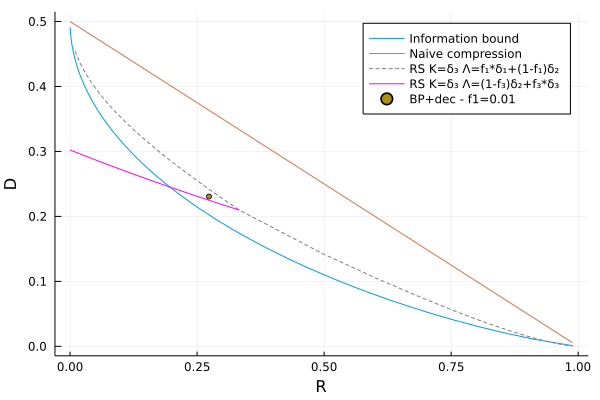

In [219]:
pl = plot_rdb()
scatter!([R], [dist], label="BP+dec - f1=$f1", ms=3)
# xlims!((0.24,0.30)); ylims!((0.18,0.30))

## Average over more than one instance

In [18]:
m = factorial(5)*11*2
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
Hs = [1]
navg = 10
dist_f3 = [Float64[] for _ in eachindex(Hs)]
for j in 1:navg
    println("#### Round $j of $navg")
    bp = bp_full(n, m, nedges, Λ, K)
    B, freevars = findbasis_slow(Array(bp.H))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", round(H,digits=4), ". ", i, " of ", length(Hs), " ------")
        efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
        _,_,d = decimate!(bp, efield, freevars, s, maxiter=1000, Tmax=1, tol=1e-4)  
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 10


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


------ H=1.0. 1 of 1 ------


LoadError: InterruptException:

In [ ]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))

# With reinforcement

In [401]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = [0,1-r,r]
K = [0,0,1]
nedges = 3m
H = 1
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(Array(bp.H));

In [402]:
maxiter = 5*10^4
cb(it, ε, bp) = (mod(it,10^3)==0 && println("Iter $it finished"); false)
ε, iters = iteration_quick!(bp; maxiter=maxiter, tol=1e-12, damp=0.5, rein=10/maxiter)

(0.19463563264200273, 50000)

In [403]:
performance(bp,s)

(2, 0.5333333333333333, 0.23333333333333334)

In [404]:
x = argmax.(bp.belief) .== 2
σ = fix_indep!(x, B, freevars)
dd = distortion(σ, s)

0.3

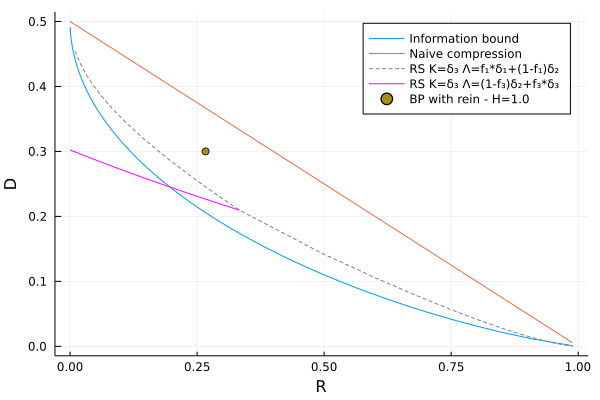

In [405]:
pl_r = plot_rdb()
scatter!(pl_r, [R], [dd], label="BP with rein - H=$(round(H,sigdigits=2))", ms=4)
plot(pl_r, size=(600,400), legend=:topright)
# xlims!((0.24,0.30)); ylims!((0.22,0.26))

In [406]:
i = 1
f3 = [0.1]
R = 1/3*(1 .- f3)
Lambda = [0,1-f3[i],f3[i]]
P = [0,0,1]
m, n, nedges, K, Λ = valid_degrees(P, Lambda, 100000)
# @assert isapprox(1-m/n, R[i], atol=1e-8)
# bp = bp_full(n, m, nedges, Λ, K)

(7, 10, 21, [0.0, 0.0, 1.0], [0.0, 0.9, 0.1])

In [350]:
f3 = 0:0.01:0.4
D = zero(f3)
R = 1/3*(1 .- f3)
@showprogress for i in eachindex(D)
    Lambda = [0,1-f3[i],f3[i]]
    P = [0,0,1]
    m, n, nedges, K, Λ = valid_degrees(P, Lambda, 2*3*5*7)
    bp = bp_full(n,m,nedges,Λ,K)
    K,Λ = 
end

Λ = [0.0, 1.0, 0.0]


Progress:   2%|█                                        |  ETA: 0:00:50

Λ = [0.0, 0.99, 0.01]


Progress:   5%|██                                       |  ETA: 0:01:36

Λ = [0.0, 0.98, 0.02]


Progress:   7%|███                                      |  ETA: 0:01:48

Λ = [0.0, 0.97, 0.03]


Progress:  10%|████                                     |  ETA: 0:01:48

Λ = [0.0, 0.96, 0.04]


Progress:  12%|█████                                    |  ETA: 0:01:48

Λ = [0.0, 0.95, 0.05]


Progress:  15%|██████                                   |  ETA: 0:01:46

Λ = [0.0, 0.94, 0.06]


Progress:  17%|███████                                  |  ETA: 0:01:41

Λ = [0.0, 0.9299999999999999, 0.07]


Progress:  20%|████████                                 |  ETA: 0:01:38

Λ = [0.0, 0.92, 0.08]


Progress:  22%|█████████                                |  ETA: 0:01:36

Λ = [0.0, 0.91, 0.09]


Progress:  24%|██████████                               |  ETA: 0:01:31

Λ = [0.0, 0.9, 0.1]


Progress:  27%|███████████                              |  ETA: 0:01:27

Λ = [0.0, 0.89, 0.11]


Progress:  29%|████████████                             |  ETA: 0:01:24

Λ = [0.0, 0.88, 0.12]


Progress:  32%|█████████████                            |  ETA: 0:01:21

Λ = [0.0, 0.87, 0.13]


Progress:  34%|██████████████                           |  ETA: 0:01:19

Λ = [0.0, 0.86, 0.14]


Progress:  37%|███████████████                          |  ETA: 0:01:17

Λ = [0.0, 0.85, 0.15]


Progress:  39%|████████████████                         |  ETA: 0:01:14

Λ = [0.0, 0.84, 0.16]


Progress:  41%|█████████████████                        |  ETA: 0:01:11

Λ = [0.0, 0.83, 0.17]


Progress:  44%|██████████████████                       |  ETA: 0:01:09

Λ = [0.0, 0.8200000000000001, 0.18]


Progress:  46%|███████████████████                      |  ETA: 0:01:07

Λ = [0.0, 0.81, 0.19]


Progress:  49%|████████████████████                     |  ETA: 0:01:04

Λ = [0.0, 0.8, 0.2]


Progress:  51%|█████████████████████                    |  ETA: 0:01:01

Λ = [0.0, 0.79, 0.21]


Progress:  54%|██████████████████████                   |  ETA: 0:00:58

Λ = [0.0, 0.78, 0.22]


Progress:  56%|███████████████████████                  |  ETA: 0:00:55

Λ = [0.0, 0.77, 0.23]


Progress:  59%|████████████████████████                 |  ETA: 0:00:53

Λ = [0.0, 0.76, 0.24]


Progress:  61%|█████████████████████████                |  ETA: 0:00:50

Λ = [0.0, 0.75, 0.25]


Progress:  63%|██████████████████████████               |  ETA: 0:00:47

Λ = [0.0, 0.74, 0.26]


Progress:  66%|███████████████████████████              |  ETA: 0:00:44

Λ = [0.0, 0.73, 0.27]


Progress:  68%|████████████████████████████             |  ETA: 0:00:41

Λ = [0.0, 0.72, 0.28]


Progress:  71%|█████████████████████████████            |  ETA: 0:00:38

Λ = [0.0, 0.71, 0.29]


Progress:  73%|██████████████████████████████           |  ETA: 0:00:35

Λ = [0.0, 0.7, 0.3]


Progress:  76%|███████████████████████████████          |  ETA: 0:00:32

Λ = [0.0, 0.69, 0.31]


Progress:  78%|████████████████████████████████         |  ETA: 0:00:29

Λ = [0.0, 0.6799999999999999, 0.32]


Progress:  80%|█████████████████████████████████        |  ETA: 0:00:25

Λ = [0.0, 0.6699999999999999, 0.33]


Progress:  83%|██████████████████████████████████       |  ETA: 0:00:22

Λ = [0.0, 0.6599999999999999, 0.34]


Progress:  85%|███████████████████████████████████      |  ETA: 0:00:19

Λ = [0.0, 0.65, 0.35]


Progress:  88%|████████████████████████████████████     |  ETA: 0:00:16

Λ = [0.0, 0.64, 0.36]


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:13

Λ = [0.0, 0.63, 0.37]


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:10

Λ = [0.0, 0.62, 0.38]


Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:06

Λ = [0.0, 0.61, 0.39]


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:03

Λ = [0.0, 0.6, 0.4]


Progress: 100%|█████████████████████████████████████████| Time: 0:02:12


In [357]:
[R ]

41×2 Matrix{Float64}:
 0.333333  0.333333
 0.33      0.33
 0.326667  0.326667
 0.323333  0.323333
 0.32      0.32
 0.316667  0.316667
 0.313333  0.313333
 0.31      0.31
 0.306667  0.306667
 0.303333  0.303333
 0.3       0.3
 0.296667  0.296667
 0.293333  0.293333
 ⋮         
 0.236667  0.236667
 0.233333  0.233333
 0.23      0.23
 0.226667  0.226667
 0.223333  0.223333
 0.22      0.22
 0.216667  0.216667
 0.213333  0.213333
 0.21      0.21
 0.206667  0.206667
 0.203333  0.203333
 0.2       0.2

In [351]:
i = 21
Λ = [0,1-f3[i],f3[i]]
RS([0,0,1], Λ, N=300, tol=1e-5, maxiter=100)

(0.2666666666666666, 0.21425573166477585, [1.5063132044451507e-7, 5.6387524630032856e-8, 5.380821093312203e-8, 5.417880905884143e-8, 5.4618779955471945e-8, 5.506667461000824e-8, 5.5521599541667426e-8, 5.598361863538798e-8, 5.645280946483648e-8, 5.692925359618384e-8  …  5.692925359618384e-8, 5.645280946483648e-8, 5.598361863538798e-8, 5.5521599541667426e-8, 5.506667461000824e-8, 5.4618779955471945e-8, 5.417880905884143e-8, 5.380821093312203e-8, 5.6387524630032856e-8, 1.5063132044451507e-7])

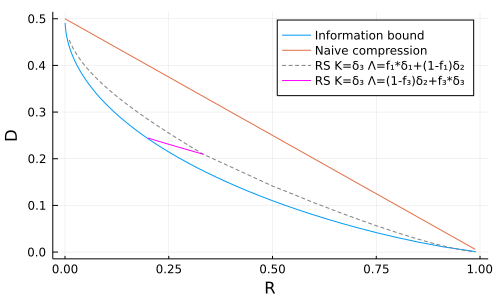

In [354]:
pp = plot_rdb(f3=false)
plot!(R, D, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃", color=:magenta, size=(500,300))
# xlims!((0.23,0.35)); ylims!((0.2,0.25))